In [1]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [2]:
# nltk.download_shell()

In [3]:
file = open("datasets/SMSSpamCollection")

In [4]:
file

<_io.TextIOWrapper name='datasets/SMSSpamCollection' mode='r' encoding='UTF-8'>

In [5]:
lines_list = [line.strip() for line in file]

In [6]:
messages = pd.read_csv(
    "datasets/SMSSpamCollection", sep="\t", names=["label", "message"]
)

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages["lenght"] = messages["message"].apply(len)

In [11]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lenght', ylabel='Count'>

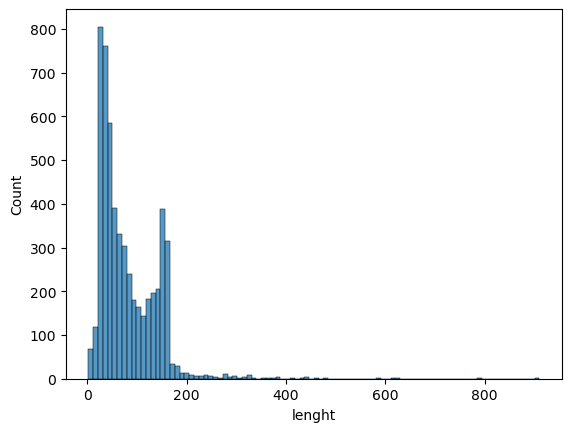

In [12]:
sns.histplot(x=messages["lenght"])

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

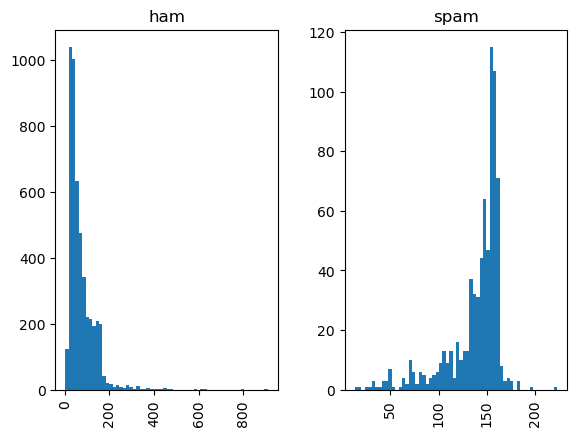

In [13]:
messages.hist(column="lenght", by="label", bins=60)

In [14]:
from nltk.corpus import stopwords

In [15]:
# stopwords.words("english") # Gets the  list of english stop words
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def text_cleaner(input_word):
    """This function will clean the text
    delete the stop words and return as a
    string

    Args:
        input_word (str): A sentence
    """

    removed_punc = [
        char for char in input_word if char.lower() not in string.punctuation
    ]

    removed_word_punctuation = "".join(removed_punc)
    list_removed_word_punctuation = removed_word_punctuation.split()
    list_important_wrds = [
        word
        for word in list_removed_word_punctuation
        if not isinstance(word, int)
        if word.lower() not in stopwords.words("english")
    ]
    return list_important_wrds

SyntaxError: invalid syntax (1215556656.py, line 20)

In [35]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
messages.head()["message"].apply(text_cleaner)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
bow_transformer = CountVectorizer(analyzer=text_cleaner).fit(messages["message"])

In [39]:
print(len(bow_transformer.vocabulary_))

11425


In [40]:
mess4 = messages["message"][3]

In [41]:
bow4 = bow_transformer.transform([mess4])

In [42]:
bow4.shape

(1, 11425)

In [44]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [46]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [47]:
message_bow = bow_transformer.transform(messages["message"])